Import Libraries

In [1]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

Import Data

In [2]:
df = pd.read_csv("C:/Users/blue3/OneDrive/Desktop/INST414/cleaned_diabetes_data.csv")
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler_standard = StandardScaler()

# Applying StandardScaler to variables, correcting the error with reshape
df['BMI'] = scaler_standard.fit_transform(df['BMI'].values.reshape(-1, 1))
df['GenHlth'] = scaler_standard.fit_transform(df['GenHlth'].values.reshape(-1, 1))
df['MentHlth'] = scaler_standard.fit_transform(df['MentHlth'].values.reshape(-1, 1))
df['PhysHlth'] = scaler_standard.fit_transform(df['PhysHlth'].values.reshape(-1, 1))
df['Age'] = scaler_standard.fit_transform(df['Age'].values.reshape(-1, 1))
df['Education'] = scaler_standard.fit_transform(df['Education'].values.reshape(-1, 1))
df['Income'] = scaler_standard.fit_transform(df['Income'].values.reshape(-1, 1))

# Viewing
scaler_standard

StandardScaler()

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler_minmax = MinMaxScaler()

# Applying MinMaxScaler to variables, correcting the error with reshape
df['BMI'] = scaler_minmax.fit_transform(df['BMI'].values.reshape(-1, 1))
df['GenHlth'] = scaler_minmax.fit_transform(df['GenHlth'].values.reshape(-1, 1))
df['MentHlth'] = scaler_minmax.fit_transform(df['MentHlth'].values.reshape(-1, 1))
df['PhysHlth'] = scaler_minmax.fit_transform(df['PhysHlth'].values.reshape(-1, 1))
df['Age'] = scaler_minmax.fit_transform(df['Age'].values.reshape(-1, 1))
df['Education'] = scaler_minmax.fit_transform(df['Education'].values.reshape(-1, 1))
df['Income'] = scaler_minmax.fit_transform(df['Income'].values.reshape(-1, 1))


# Viewing
scaler_minmax

MinMaxScaler()

In [5]:
# Initializing the scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Applying StandardScaler and MinMaxScaler to the 'Age' column
df_standard_scaled = df.copy()
df_minmax_scaled = df.copy()

# Example of comparing the original, standardized and rescaled versions of a variable
print("Original:", df['BMI'].head())
print("Standard Scaled:", df_standard_scaled['BMI'].head())
print("MinMax Scaled:", df_minmax_scaled['BMI'].head())

Original: 0    0.325581
1    0.151163
2    0.186047
3    0.174419
4    0.139535
Name: BMI, dtype: float64
Standard Scaled: 0    0.325581
1    0.151163
2    0.186047
3    0.174419
4    0.139535
Name: BMI, dtype: float64
MinMax Scaled: 0    0.325581
1    0.151163
2    0.186047
3    0.174419
4    0.139535
Name: BMI, dtype: float64


Set Training and Testing Data

In [25]:
#Split data into features and target
X = df.drop("Diabetes_012", axis = 1) #Features
y = df["Diabetes_012"] #Target

X.shape

(249049, 21)

In [7]:
y.shape

(249049,)

Baseline Model (Before SMOTE) + Test and Train Splitting

In [26]:
# code from: https://medium.com/@preethi_prakash/understanding-baseline-models-in-machine-learning-3ed94f03d645
#replaced strategy with "most_frequent" for most common class in dataset

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a baseline random classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Fit the baseline classifier on the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Baseline Classifier Accuracy:", accuracy)
print("Classification Report:")
print(report)

Baseline Classifier Accuracy: 0.8588034531218631
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     42777
         2.0       0.00      0.00      0.00      7033

    accuracy                           0.86     49810
   macro avg       0.43      0.50      0.46     49810
weighted avg       0.74      0.86      0.79     49810



Synthetic Minority Oversampling Technique (SMOTE)

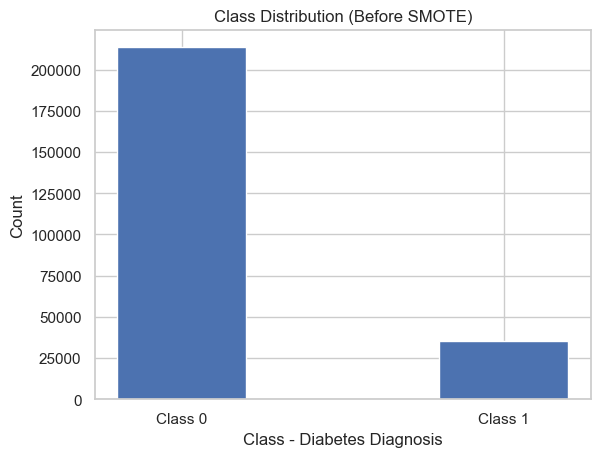

After SMOTE:
 Diabetes_012
0.0    213703
2.0    213703
Name: count, dtype: int64


In [28]:
# Reference code: https://www.geeksforgeeks.org/machine-learning/smote-for-imbalanced-classification-with-python/
from imblearn.over_sampling import SMOTE

count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class - Diabetes Diagnosis')
plt.ylabel('Count')
plt.title('Class Distribution (Before SMOTE)')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)
print("After SMOTE:\n", y.value_counts())

Primary Model(s)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Predict + Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
print(f"RandomForest Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", report)

RandomForest Accuracy: 85.86%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     42777
         2.0       0.50      0.19      0.28      7033

    accuracy                           0.86     49810
   macro avg       0.69      0.58      0.60     49810
weighted avg       0.83      0.86      0.83     49810



In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

#Predict + Evaluate
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
print(f" LogisticRegression Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", report)

 LogisticRegression Accuracy: 86.24%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     42777
         2.0       0.54      0.17      0.26      7033

    accuracy                           0.86     49810
   macro avg       0.71      0.57      0.59     49810
weighted avg       0.83      0.86      0.83     49810



In [32]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)

#Predict + Evaluate
y_pred = ab.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'AdaBoost Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:\n", report)

AdaBoost Accuracy: 86.35%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     42777
         2.0       0.54      0.21      0.31      7033

    accuracy                           0.86     49810
   macro avg       0.71      0.59      0.62     49810
weighted avg       0.83      0.86      0.84     49810



Feature Engineering/Selection

In [33]:
#Principal Component Analysis on LogisticRegression- code from https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)
print(f" LogisticRegression Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", report)

 LogisticRegression Accuracy: 70.33%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.72      0.71     64141
         2.0       0.71      0.69      0.70     64081

    accuracy                           0.70    128222
   macro avg       0.70      0.70      0.70    128222
weighted avg       0.70      0.70      0.70    128222



Confusion Matrix

Model 1: RandomForestClassifier
Training Accuracy: 0.9967678752874485
Testing Accuracy: 0.7180827003166383


Confusion matrix 

 [[44503 19638]
 [16510 47571]]

True Positives(TP) =  44503

True Negatives(TN) =  47571

False Positives(FP) =  19638

False Negatives(FN) =  16510



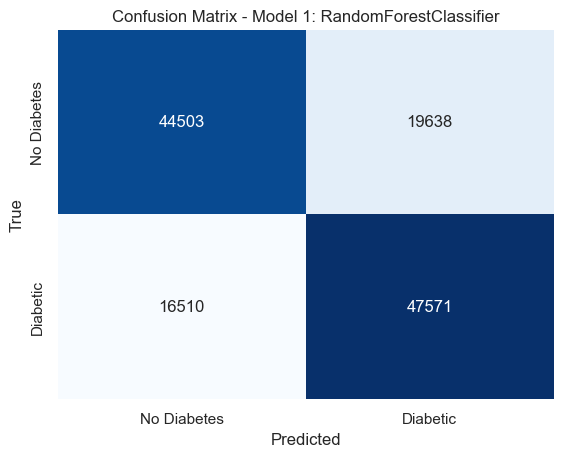

------------------
Model 2: LogisticRegression
Training Accuracy: 0.7064114391143912
Testing Accuracy: 0.7039197641590367


Confusion matrix 

 [[46091 18050]
 [19914 44167]]

True Positives(TP) =  46091

True Negatives(TN) =  44167

False Positives(FP) =  18050

False Negatives(FN) =  19914



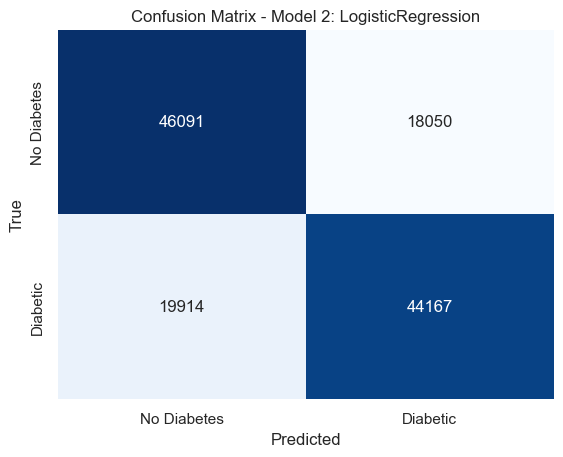

------------------
Model 3: AdaBoostClassifier
Training Accuracy: 0.7085940424621637
Testing Accuracy: 0.7082949883795292


Confusion matrix 

 [[39835 24306]
 [13097 50984]]

True Positives(TP) =  39835

True Negatives(TN) =  50984

False Positives(FP) =  24306

False Negatives(FN) =  13097



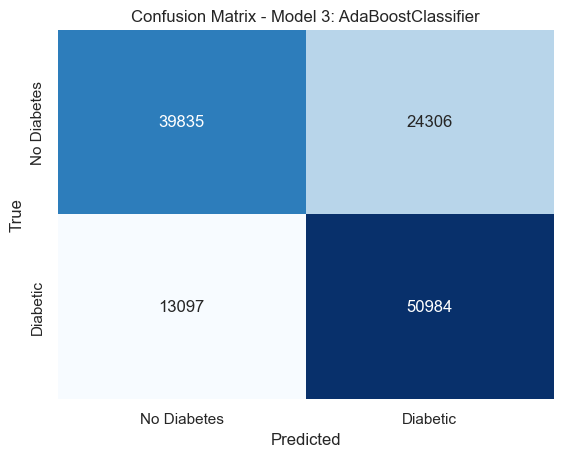

------------------


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
models = [RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), AdaBoostClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Diabetes", "Diabetic"],
                yticklabels=["No Diabetes", "Diabetic"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

Feature Importance

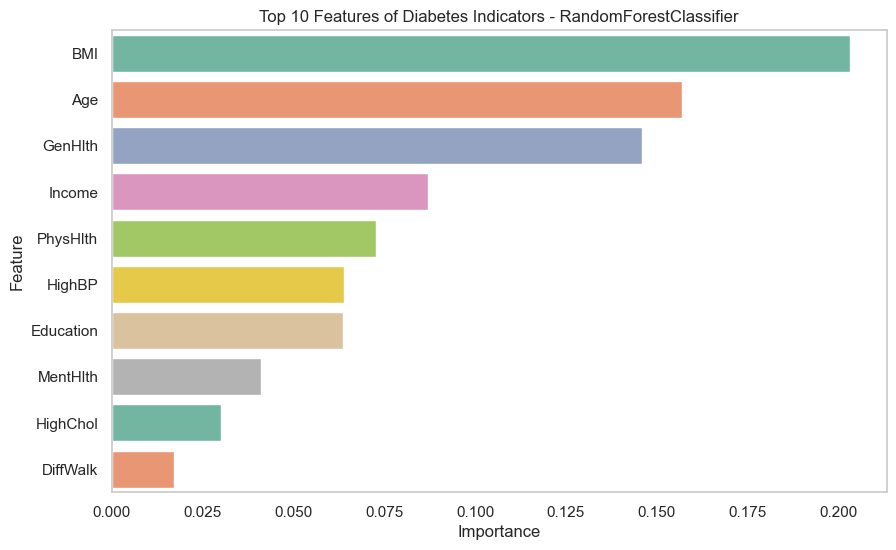

In [17]:
# Train models that support feature importances
models_with_feature_importances = [("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ]

# Iterate over models
for model_name, model in models_with_feature_importances:

    # Train model
    model.fit(X, y)

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X.columns,
                                           'Importance': feature_importances})

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10], palette='Set2')
    plt.title(f"Top 10 Features of Diabetes Indicators - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

Model Comparison (Troubleshoot)

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

results = []
models = {"RandomForest": RandomForestClassifier(random_state=42), "LogisticRegression": LogisticRegression(random_state=42), 
          "AdaBoost": AdaBoostClassifier(random_state=42)}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Generate predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probability for class 1

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": acc, "AUC": auc, "F1": f1})

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).set_index("Model").sort_values(by="AUC", ascending=False)
print("\n=== Model Performance Summary ===")
print(results_df.round(3))


ValueError: pos_label=1 is not a valid label. It should be one of [0.0, 2.0]

In [ ]:
# Bar chart comparing models by AUC score
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y="AUC", data=results_df.reset_index(), palette="Blues_d", hue=results_df.index)
plt.title("Model Comparison — AUC (Higher is Better)", fontsize=14)
plt.ylabel("AUC")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.show()